# IMPORTING NECESSSARY LIABRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

# IMPORTING THE DATA SET

In [2]:
df = pd.read_pickle(r"C:\Users\Thanigainathan\Downloads\archive (1)\RELIANCE-15minute-Hist")
df = pd.DataFrame(df)
df

date     open     high      low    close   volume
0     2015-02-02 09:15:00+05:30   458.48   459.90   457.03   458.25   587446
1     2015-02-02 09:30:00+05:30   458.35   458.48   457.00   457.03   288842
2     2015-02-02 09:45:00+05:30   457.03   457.88   456.45   457.25   232376
3     2015-02-02 10:00:00+05:30   457.25   457.75   455.75   457.00   208256
4     2015-02-02 10:15:00+05:30   457.00   457.48   456.50   457.00    90870
...                         ...      ...      ...      ...      ...      ...
26226 2019-05-08 15:00:00+05:30  1303.00  1306.70  1302.05  1304.75   650447
26227 2019-05-08 15:15:00+05:30  1304.70  1305.00  1292.50  1298.00  1993463
26228 2019-05-08 15:30:00+05:30  1297.75  1299.45  1297.75  1299.45     5877
26229 2019-05-08 15:45:00+05:30  1299.45  1299.45  1299.45  1299.45     1479
26230 2019-05-08 16:00:00+05:30  1299.45  1299.45  1299.45  1299.45        0

[26231 rows x 6 columns]

In [3]:
print(df.dtypes)

date      datetime64[ns, tzoffset(None, 19800)]
open                                    float64
high                                    float64
low                                     float64
close                                   float64
volume                                    int64
dtype: object


# DATA CLEANING

In [4]:
#Stripping Whitespace: If your column names have leading or trailing spaces, you can clean them up with:
df.columns = df.columns.str.strip()
#Lowercase Column Names: To ensure consistency in case:
df.columns = df.columns.str.lower()
#Renaming Columns: If any columns are incorrectly named, you can rename them:
df.rename(columns={'Date': 'date', 'Open': 'open'}, inplace=True)
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [5]:
# Loading and Processing the Stock Data
import pandas as pd

# Define the function to process the 15-minute stock data
def process_stock_data(df, stock_name):
    # Preprocessing
    df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
    df['time'] = df['date'].dt.time           # Extract time
    df['date'] = df['date'].dt.date           # Extract date only

    # Grouping the data by date and aggregating
    temp = df.groupby(['date']).agg({
        'low': 'min', 
        'high': 'max', 
        'open': 'first', 
        'close': 'last', 
        'volume': 'sum'
    }).reset_index()
    
    temp['stock_name'] = stock_name  # Add the stock name column
    
    return temp

# Example usage: Load and process the 15-minute stock data
file_path = r"C:\Users\Thanigainathan\Downloads\archive (1)\RELIANCE-15minute-Hist"
df = pd.read_pickle(file_path)
df = pd.DataFrame(df)

# Specify the stock name
stock_name = "RELIANCE"

# Process the 15-minute DataFrame to daily data
df_daily = process_stock_data(df, stock_name)

# Set the date as the index
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily.set_index('date', inplace=True)

# Check for missing dates
date_range = pd.date_range(start=df_daily.index.min(), end=df_daily.index.max(), freq='B')  # 'B' for business days
missing_dates = date_range.difference(df_daily.index)

# Reindex the DataFrame to include missing dates
df_daily = df_daily.reindex(date_range)

# Display the processed daily DataFrame
print("Processed Daily DataFrame:")
print(df_daily)


Processed Daily DataFrame:
                low     high     open    close      volume stock_name
2015-02-02   452.90   459.90   458.48   454.10   8805408.0   RELIANCE
2015-02-03   456.90   470.43   457.00   468.13   7807994.0   RELIANCE
2015-02-04   462.95   471.90   469.95   463.35   6420064.0   RELIANCE
2015-02-05   458.90   469.95   465.50   460.80   5634828.0   RELIANCE
2015-02-06   451.55   464.95   462.25   455.58   4124050.0   RELIANCE
...             ...      ...      ...      ...         ...        ...
2019-05-02  1382.20  1413.90  1392.00  1403.25   8659681.0   RELIANCE
2019-05-03  1402.65  1417.50  1407.95  1409.90   6497654.0   RELIANCE
2019-05-06  1378.30  1402.70  1398.00  1382.95   7158075.0   RELIANCE
2019-05-07  1340.30  1394.80  1394.80  1341.00   8853418.0   RELIANCE
2019-05-08  1292.50  1340.00  1340.00  1299.45  14592926.0   RELIANCE

[1113 rows x 6 columns]


In [6]:
print("\nMissing values before processing:")
print(df_daily.isnull().sum())


Missing values before processing:
low           62
high          62
open          62
close         62
volume        62
stock_name    62
dtype: int64


# OUTLIER DETECTION

In [7]:
#Check for outliers in the price data using box plots or z-scores.
df_daily['z_score'] = (df_daily['close'] - df_daily['close'].mean()) / df_daily['close'].std()
outliers = df_daily[df_daily['z_score'].abs() > 3]  # Identify outliers using a threshold of 3
print(outliers)

Empty DataFrame
Columns: [low, high, open, close, volume, stock_name, z_score]
Index: []


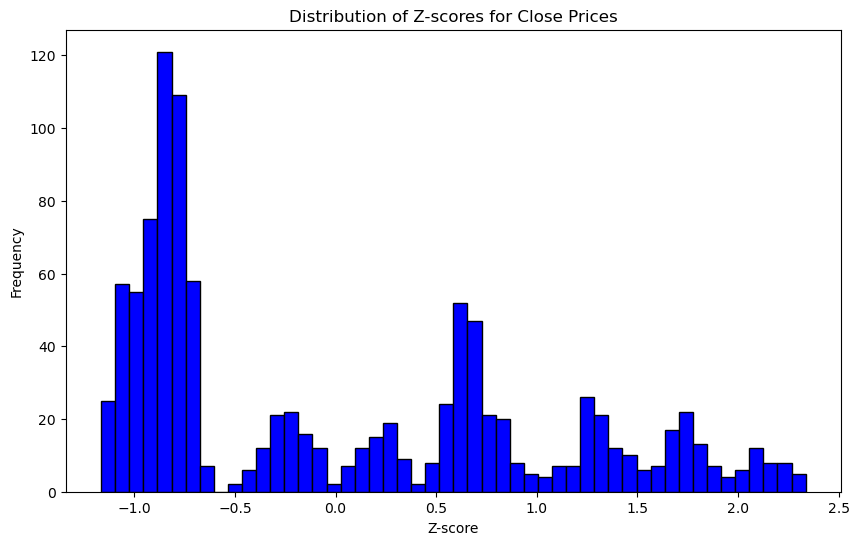

In [8]:
#Check Z-score Distribution: Before setting a threshold of 3, it would be helpful to see the distribution of the z-scores to understand how extreme your data points are. This can help you decide if a different threshold would be more appropriate.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_daily['z_score'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Z-scores for Close Prices')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

In [9]:
df_daily['z_score'] = (df_daily['close'] - df_daily['close'].mean()) / df_daily['close'].std()
outliers = df_daily[df_daily['z_score'].abs() > 2]  # Identify outliers using a threshold of 2
print(outliers)

                low     high     open    close      volume stock_name  \
2018-08-28  1296.05  1323.00  1296.75  1322.95   8677225.0   RELIANCE   
2019-03-12  1315.05  1334.00  1316.90  1330.85  11197222.0   RELIANCE   
2019-03-13  1328.10  1358.00  1337.00  1349.00  11199012.0   RELIANCE   
2019-03-14  1336.15  1362.00  1349.75  1340.00  10366211.0   RELIANCE   
2019-03-15  1311.60  1358.75  1345.00  1323.75  15868943.0   RELIANCE   
2019-03-18  1329.50  1357.95  1331.00  1357.00  10082048.0   RELIANCE   
2019-03-19  1343.10  1380.00  1360.00  1377.25   9771400.0   RELIANCE   
2019-03-20  1364.00  1387.95  1377.00  1374.45   9871414.0   RELIANCE   
2019-03-22  1336.90  1380.80  1375.45  1345.10  11421144.0   RELIANCE   
2019-03-25  1317.00  1336.75  1331.95  1328.90   7920599.0   RELIANCE   
2019-03-26  1330.30  1371.05  1330.30  1369.00   9458912.0   RELIANCE   
2019-03-27  1344.30  1377.95  1377.95  1347.00  10063773.0   RELIANCE   
2019-03-28  1343.05  1369.80  1350.25  1361.50  104

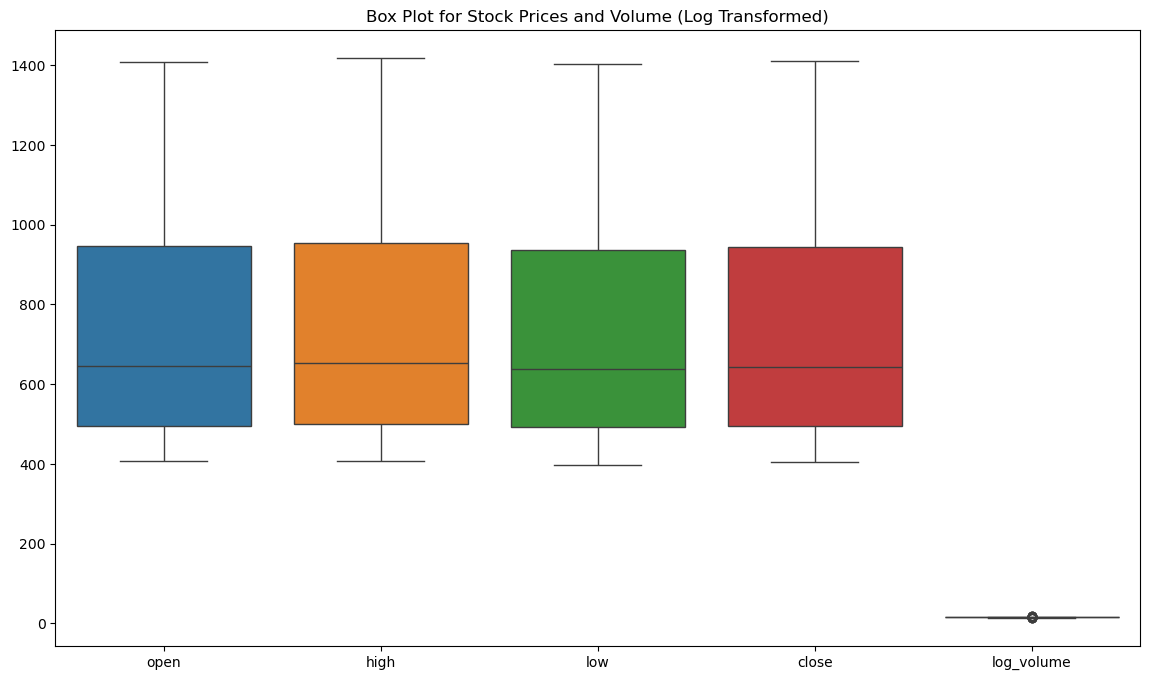

In [10]:
plt.figure(figsize=(14, 8))
df_daily['log_volume'] = np.log(df_daily['volume'])  # Apply log transformation to 'volume'
sns.boxplot(data=df_daily[['open', 'high', 'low', 'close', 'log_volume']])
plt.title('Box Plot for Stock Prices and Volume (Log Transformed)')
plt.show()

In [11]:
# Optionally fill missing values
df_daily.fillna(method='ffill', inplace=True)  

C:\Users\Thanigainathan\AppData\Local\Temp\ipykernel_8924\3082920605.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily.fillna(method='ffill', inplace=True)


In [12]:
df_daily.to_csv("Clean_dataset.csv", index=False)

In [13]:
print("\nMissing values after processing:")
print(df_daily.isnull().sum())


Missing values after processing:
low           0
high          0
open          0
close         0
volume        0
stock_name    0
z_score       0
log_volume    0
dtype: int64


In [14]:
print(df.describe())# Summary statistics for numerical columns

               open          high           low         close        volume
count  26231.000000  26231.000000  26231.000000  26231.000000  2.623100e+04
mean     739.320535    740.641894    737.925143    739.308286  3.115162e+05
std      286.903640    287.457618    286.298588    286.904062  3.816801e+05
min      398.750000    400.230000    398.280000    398.750000  0.000000e+00
25%      495.530000    496.350000    494.750000    495.500000  1.276230e+05
50%      644.000000    645.100000    642.850000    643.880000  2.060620e+05
75%      944.725000    946.050000    942.775000    944.725000  3.593500e+05
max     1416.850000   1417.500000   1412.850000   1417.000000  1.093779e+07


# CANDLESTICK PLOT (Open, High, Low, and Close (OHLC) prices)

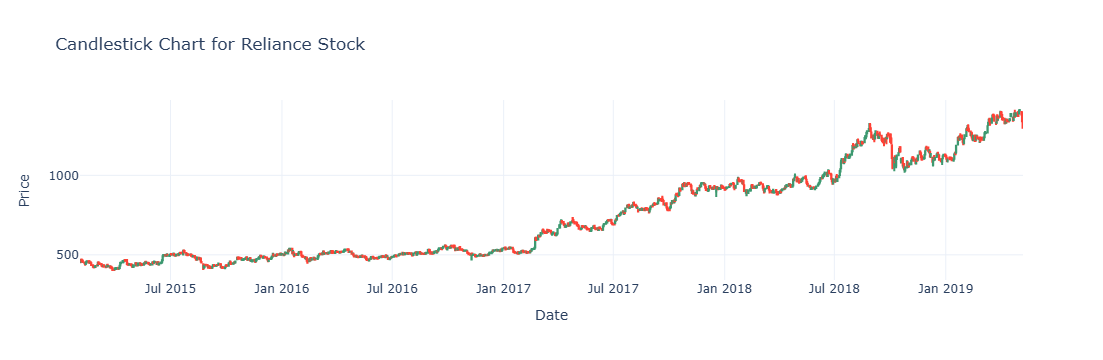

In [15]:
#Candlestick Plot: Plot open, high, low, and close (OHLC) using Plotly for a more detailed view of stock behavior.
import plotly.graph_objs as go

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df_daily.index,               # Dates on the x-axis
    open=df_daily['open'],          # Opening prices
    high=df_daily['high'],          # Highest prices
    low=df_daily['low'],            # Lowest prices
    close=df_daily['close'],        # Closing prices
    name='Candlestick'              # Name for the legend
)])

# Update layout for the figure
fig.update_layout(
    title='Candlestick Chart for Reliance Stock',  # Title of the chart
    xaxis_title='Date',                             # Title for the x-axis
    yaxis_title='Price',                           # Title for the y-axis
    xaxis_rangeslider_visible=False,               # Hide range slider if not needed
    template='plotly_white'                        # Optional: use a clean template
)

# Show the plot
fig.show()

# ROLLING STATISTICS

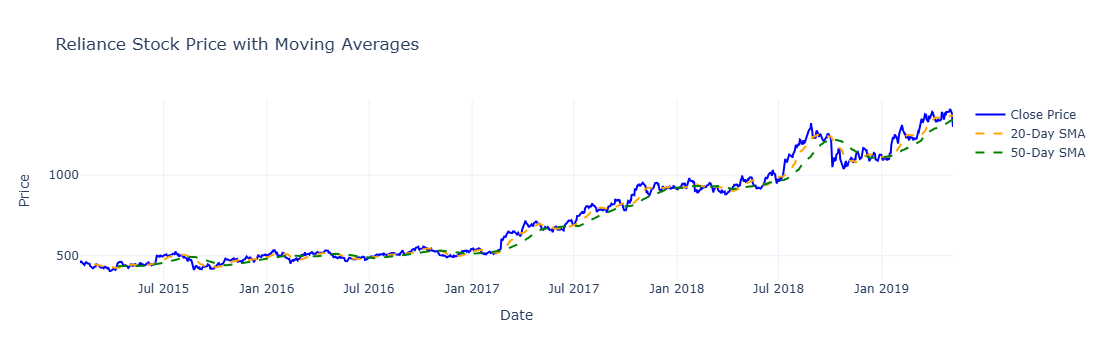

In [16]:
#It's useful to compute rolling averages and other rolling statistics to smooth out daily volatility and identify trends.

import plotly.graph_objs as go

# Calculate Simple Moving Averages (SMA)
df_daily['SMA_20'] = df_daily['close'].rolling(window=20).mean()
df_daily['SMA_50'] = df_daily['close'].rolling(window=50).mean()

# Create the figure
fig = go.Figure()

# Add closing price trace
fig.add_trace(go.Scatter(
    x=df_daily.index,
    y=df_daily['close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue')
))

# Add 20-day SMA trace
fig.add_trace(go.Scatter(
    x=df_daily.index,
    y=df_daily['SMA_20'],
    mode='lines',
    name='20-Day SMA',
    line=dict(color='orange', dash='dash')  # Dashed line for SMA
))

# Add 50-day SMA trace
fig.add_trace(go.Scatter(
    x=df_daily.index,
    y=df_daily['SMA_50'],
    mode='lines',
    name='50-Day SMA',
    line=dict(color='green', dash='dash')  # Dashed line for SMA
))

# Update layout
fig.update_layout(
    title='Reliance Stock Price with Moving Averages',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white'
)

# Show the plot
fig.show()


# VOLATILITY ANALYSIS

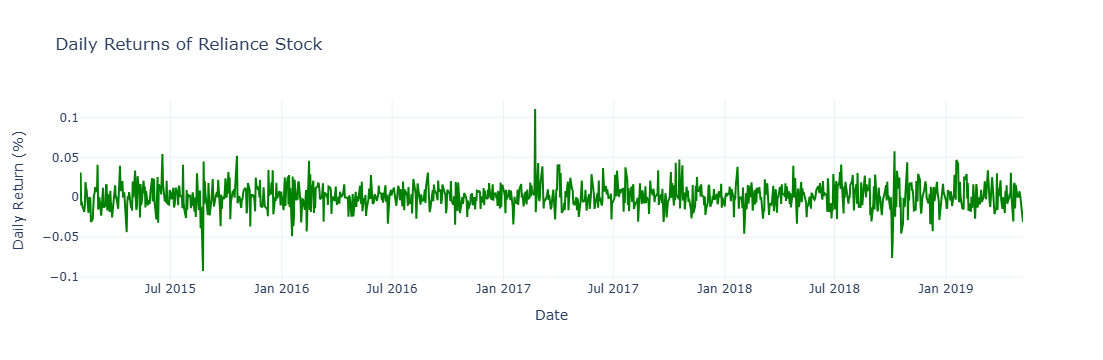

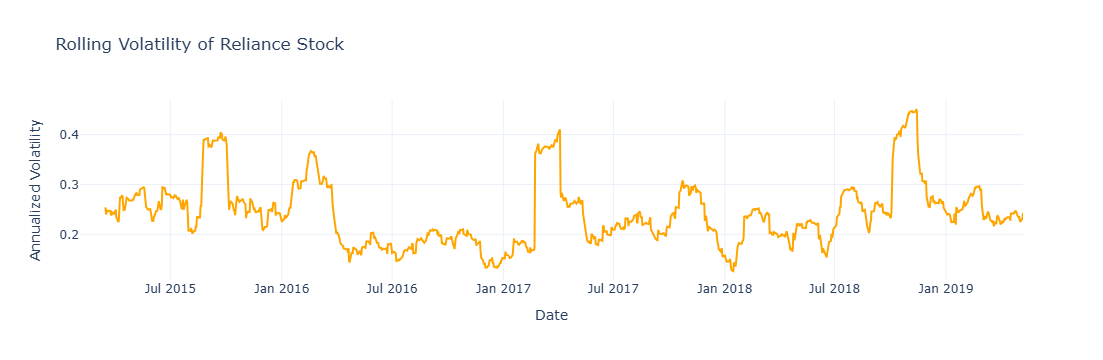

In [17]:
#You can compute daily returns to analyze volatility and visualize how volatile the stock is.

#Daily Returns:
import plotly.graph_objs as go
import numpy as np

# Calculate daily returns
df_daily['returns'] = df_daily['close'].pct_change()

# Calculate rolling volatility (30-day rolling standard deviation of returns, annualized)
df_daily['volatility'] = df_daily['returns'].rolling(window=30).std() * np.sqrt(252)

# Create a figure for Daily Returns
fig_returns = go.Figure()

# Add daily returns trace
fig_returns.add_trace(go.Scatter(
    x=df_daily.index,
    y=df_daily['returns'],
    mode='lines',
    name='Daily Returns',
    line=dict(color='green')
))

# Update layout for Daily Returns
fig_returns.update_layout(
    title='Daily Returns of Reliance Stock',
    xaxis_title='Date',
    yaxis_title='Daily Return (%)',
    template='plotly_white'
)

# Show the Daily Returns plot
fig_returns.show()

# Create a figure for Volatility
fig_volatility = go.Figure()

# Add volatility trace
fig_volatility.add_trace(go.Scatter(
    x=df_daily.index,
    y=df_daily['volatility'],
    mode='lines',
    name='Rolling Volatility (30-day)',
    line=dict(color='orange')
))

# Update layout for Volatility
fig_volatility.update_layout(
    title='Rolling Volatility of Reliance Stock',
    xaxis_title='Date',
    yaxis_title='Annualized Volatility',
    template='plotly_white'
)

# Show the Volatility plot
fig_volatility.show()


# CORRELATION ANALYSIS

            open      high       low     close    volume
open    1.000000  0.999662  0.999646  0.999153  0.104975
high    0.999662  1.000000  0.999636  0.999689  0.114829
low     0.999646  0.999636  1.000000  0.999653  0.101413
close   0.999153  0.999689  0.999653  1.000000  0.110613
volume  0.104975  0.114829  0.101413  0.110613  1.000000


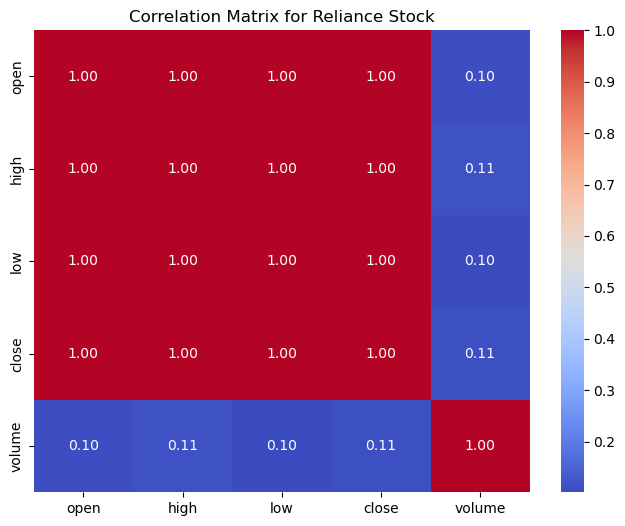

In [18]:
#Correlation Analysis
#Check for correlations between stock price variables (e.g., open, close, volume).
corr_matrix = df_daily[['open', 'high', 'low', 'close', 'volume']].corr()
print(corr_matrix)

# Visualize Correlation Matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Reliance Stock')
plt.show()

# SEASONALITY AND TREND DECOMPOSITION

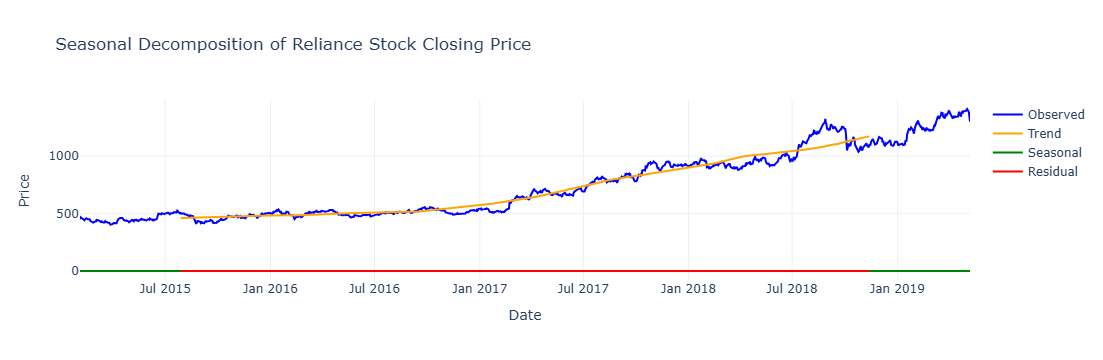

In [19]:
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_daily['close'], model='multiplicative', period=252)

# Extract the components
observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Create a figure for the decomposition
fig = go.Figure()

# Add observed component
fig.add_trace(go.Scatter(x=observed.index, y=observed, mode='lines', name='Observed', line=dict(color='blue')))

# Add trend component
fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend', line=dict(color='orange')))

# Add seasonal component
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonal', line=dict(color='green')))

# Add residual component
fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual', line=dict(color='red')))

# Update layout
fig.update_layout(
    title='Seasonal Decomposition of Reliance Stock Closing Price',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white'
)

# Show the decomposition plot
fig.show()


# YEARLY STOCK TREND

In [20]:
# Convert 'date' to datetime format if not already
df['date'] = pd.to_datetime(df['date'])

# Create separate DataFrames for each year
df_15 = df[df['date'].dt.year == 2015]
df_16 = df[df['date'].dt.year == 2016]
df_17 = df[df['date'].dt.year == 2017]
df_18 = df[df['date'].dt.year == 2018]
df_19 = df[df['date'].dt.year == 2019]


C:\Users\Thanigainathan\AppData\Local\Temp\ipykernel_8924\2935549240.py:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Thanigainathan\AppData\Local\Temp\ipykernel_8924\2935549240.py:9: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Thanigainathan\AppData\Local\Temp\ipykernel_8924\2935549240.py:10: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Thanigainathan\AppData\Local\Temp\ipykernel_8924\2935549240.py:11: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Thanigainathan\AppData\Local\Temp\ipykernel_8924\2935549240.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a futu

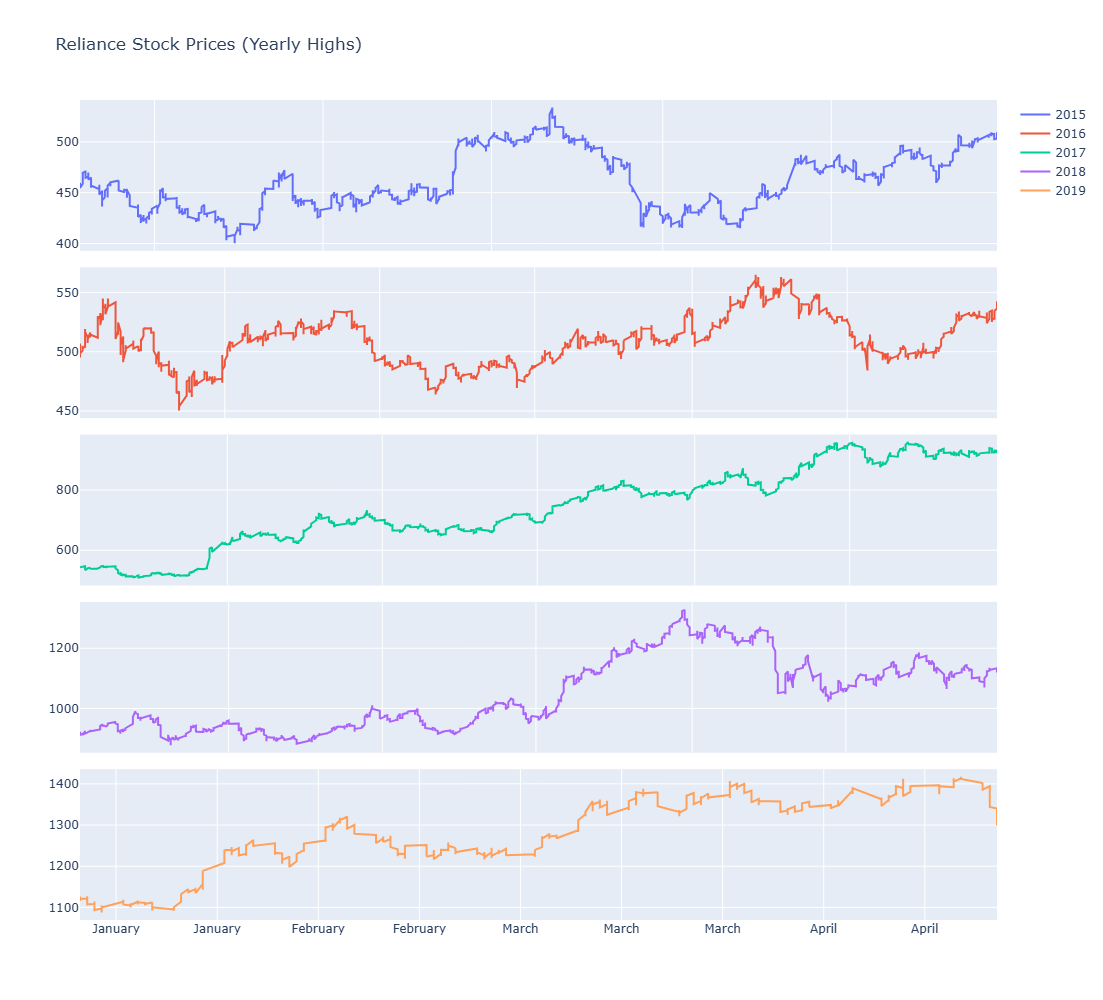

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 5 rows and 1 column
fig = make_subplots(rows=5, cols=1, start_cell="top-left", vertical_spacing=0.02)

# Add stock price trace for each year
fig.add_trace(go.Scatter(x=df_15['date'], y=df_15['high'].fillna(method='ffill'), name="2015"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_16['date'], y=df_16['high'].fillna(method='ffill'), name="2016"), row=2, col=1)
fig.add_trace(go.Scatter(x=df_17['date'], y=df_17['high'].fillna(method='ffill'), name="2017"), row=3, col=1)
fig.add_trace(go.Scatter(x=df_18['date'], y=df_18['high'].fillna(method='ffill'), name="2018"), row=4, col=1)
fig.add_trace(go.Scatter(x=df_19['date'], y=df_19['high'].fillna(method='ffill'), name="2019"), row=5, col=1)

# Update layout with appropriate dimensions and title
fig.update_layout(
    height=1000, 
    width=800, 
    title="Reliance Stock Prices (Yearly Highs)",
    showlegend=True
)

# Hide x-axis tick labels for all except the last subplot (2019)
fig.update_xaxes(showticklabels=False, row=1, col=1)
fig.update_xaxes(showticklabels=False, row=2, col=1)
fig.update_xaxes(showticklabels=False, row=3, col=1)
fig.update_xaxes(showticklabels=False, row=4, col=1)
fig.update_xaxes(tickformat='%B', row=5, col=1)  # Format for months in the last row

# Show plot
fig.show()


# VOLUME TRADED

In [22]:
# Assuming you have a dataframe named df with a 'date' column and 'volume' column
df['year'] = df['date'].dt.year  # Extract year from the date column
df_year = df.groupby('year').agg({'volume': 'sum'})  # Group by year and sum the volumes


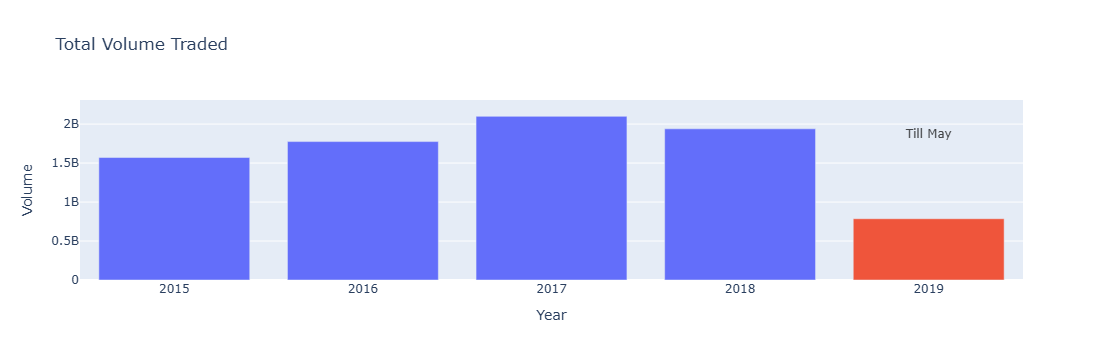

In [23]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your original DataFrame containing 'date' and 'volume'
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
df['year'] = df['date'].dt.year  # Extract year from the date column

# Create df_year by summing the volumes per year
df_year = df.groupby('year').agg({'volume': 'sum'}).reset_index()

# Create the figure
fig = go.Figure()

# Add bar trace for volume
fig.add_trace(go.Bar(
    x=df_year['year'],  # Use the 'year' column for x-axis
    y=df_year['volume'],
    marker_color=['#636EFA', '#636EFA', '#636EFA', '#636EFA', '#EF553B'],  # Use consistent color coding
    name="Volume Traded"  # Add a name for the trace
))

# Add annotation for May 2019
fig.add_annotation(
    x=2019,  # Adjust based on actual data
    y=df_year['volume'].max() * 0.9,  # Example to position the annotation, adjust accordingly
    text="Till May",
    showarrow=False,
    opacity=0.7,
    font=dict(color="BLACK")  # Set font properties for better visibility
)

# Update layout for better visibility
fig.update_layout(
    title="Total Volume Traded",
    yaxis_title="Volume",
    yaxis=dict(range=[0, df_year['volume'].max() * 1.1]),  # Set y-axis limits
    xaxis_title="Year",  # Add x-axis title
    barmode='group'  # Set bar mode
)

# Show the figure
fig.show()


In [26]:
!pip install prophet

# FORECASTING THE PRICE TILL 2026

19:19:26 - cmdstanpy - INFO - Chain [1] start processing
19:19:26 - cmdstanpy - INFO - Chain [1] done processing


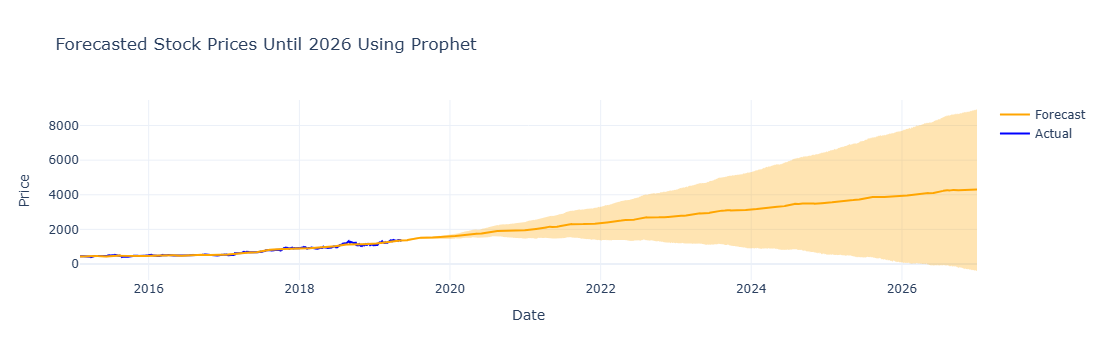

In [28]:
from prophet import Prophet
import plotly.graph_objects as go
from datetime import datetime

# Reset the index to turn the index into a column
df_daily_reset = df_daily.reset_index()

# Prepare the DataFrame for Prophet
prophet_df = df_daily_reset[['index', 'close']].rename(columns={'index': 'ds', 'close': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Get the last date in the dataset
last_date = prophet_df['ds'].max()

# Calculate the number of days from the last date to the end of 2026
end_2026 = datetime(2026, 12, 31)
days_to_forecast = (end_2026 - last_date).days

# Create a DataFrame for future dates to predict until the end of 2026
future = model.make_future_dataframe(periods=days_to_forecast)

# Make predictions for future dates until 2026
forecast = model.predict(future)

# Plot the results using Plotly
fig = go.Figure()

# Add the actual closing prices
fig.add_trace(go.Scatter(x=prophet_df['ds'], y=prophet_df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Add the forecasted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))

# Add the uncertainty intervals
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat_upper'], 
    mode='lines', 
    name='Upper Bound', 
    line=dict(width=0), 
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat_lower'], 
    mode='lines', 
    name='Lower Bound', 
    fill='tonexty', 
    fillcolor='rgba(255, 165, 0, 0.3)', 
    line=dict(width=0), 
    showlegend=False
))

# Update layout for the extended forecast
fig.update_layout(
    title='Forecasted Stock Prices Until 2026 Using Prophet',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white'
)

# Show the plot for forecast until 2026
fig.show()


In [29]:
# Select the relevant columns (ds, yhat, yhat_lower, yhat_upper)
forecast_to_save = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Save the forecasted values to a CSV file
forecast_to_save.to_csv('prophet_forecast_until_2026.csv', index=False)

# Confirmation message
print("Forecast values saved to 'prophet_forecast_until_2026.csv'.")


Forecast values saved to 'prophet_forecast_until_2026.csv'.


# TEST AND TRAINING

In [30]:
# Split data into training and test sets
train_size = int(0.8 * len(prophet_df))  # 80% for training
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]


In [31]:
# Initialize and fit the Prophet model on the training set
model = Prophet()
model.fit(train_df)


19:21:33 - cmdstanpy - INFO - Chain [1] start processing
19:21:34 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
# Create a DataFrame for future dates including both the training and test period
future_train = model.make_future_dataframe(periods=len(test_df))

# Make predictions
forecast_train = model.predict(future_train)


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Performance on training data
train_pred = forecast_train.loc[:train_size - 1, 'yhat']  # Predictions for training period
train_true = train_df['y']  # Actual values in the training period

# Performance on test data
test_pred = forecast_train.loc[train_size:, 'yhat']  # Predictions for test period
test_true = test_df['y']  # Actual values in the test period

# Calculate MAE and RMSE for training and test sets
mae_train = mean_absolute_error(train_true, train_pred)
mae_test = mean_absolute_error(test_true, test_pred)
rmse_train = np.sqrt(mean_squared_error(train_true, train_pred))
rmse_test = np.sqrt(mean_squared_error(test_true, test_pred))

print(f'MAE Train: {mae_train}, MAE Test: {mae_test}')
print(f'RMSE Train: {rmse_train}, RMSE Test: {rmse_test}')


MAE Train: 14.72538235819277, MAE Test: 107.0645221544474
RMSE Train: 18.4015500128041, RMSE Test: 132.2323614241946


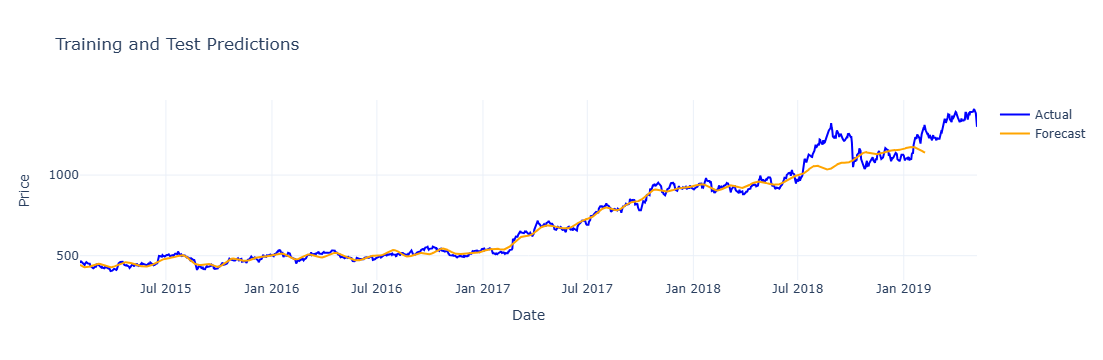

In [34]:
fig = go.Figure()

# Add the actual values
fig.add_trace(go.Scatter(x=prophet_df['ds'], y=prophet_df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Add the forecasted values
fig.add_trace(go.Scatter(x=forecast_train['ds'], y=forecast_train['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))

# Update layout
fig.update_layout(
    title='Training and Test Predictions',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white'
)

# Show the plot
fig.show()


In [36]:
model = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10)
model.fit(train_df)
model_str = str(model)
print(model_str)
# Get a detailed string representation of the model's parameters
params_str = str(model.__dict__)
print(params_str)


19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing


{'growth': 'linear', 'changepoints': 28    2015-03-12
57    2015-04-22
85    2015-06-01
114   2015-07-10
142   2015-08-19
171   2015-09-29
199   2015-11-06
228   2015-12-17
256   2016-01-26
284   2016-03-04
313   2016-04-14
341   2016-05-24
370   2016-07-04
398   2016-08-11
427   2016-09-21
455   2016-10-31
483   2016-12-08
512   2017-01-18
540   2017-02-27
569   2017-04-07
597   2017-05-17
626   2017-06-27
654   2017-08-04
683   2017-09-14
711   2017-10-24
Name: ds, dtype: datetime64[ns], 'n_changepoints': 25, 'specified_changepoints': False, 'changepoint_range': 0.8, 'yearly_seasonality': 'auto', 'weekly_seasonality': 'auto', 'daily_seasonality': 'auto', 'holidays': None, 'seasonality_mode': 'additive', 'holidays_mode': 'additive', 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10.0, 'mcmc_samples': 0, 'interval_width': 0.8, 'uncertainty_samples': 1000, 'scaling': 'absmax', 'start': Timestamp('2015-02-02 00:00:00'), 'y_min': 0.0, 'y_scale': 

# EVALUATION MERTICS

In [37]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load and prepare data
df_daily_reset = df_daily.reset_index()
prophet_df = df_daily_reset[['index', 'close']].rename(columns={'index': 'ds', 'close': 'y'})

# Split into training and test sets (80% train, 20% test)
train_size = int(0.8 * len(prophet_df))
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]

# Initialize and fit the model on the training data
model = Prophet()
model.fit(train_df)

# Forecast for the test period
future_train = model.make_future_dataframe(periods=len(test_df))
forecast_train = model.predict(future_train)

# Extract predicted values and actual values for the test set
test_pred = forecast_train.loc[train_size:, 'yhat']
test_true = test_df['y']

# Calculate MAE and RMSE
mae_test = mean_absolute_error(test_true, test_pred)
rmse_test = np.sqrt(mean_squared_error(test_true, test_pred))

# Print MAE and RMSE
print(f'MAE Test: {mae_test}')
print(f'RMSE Test: {rmse_test}')

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate and print MAPE
mape_test = mean_absolute_percentage_error(test_true, test_pred)
print(f'MAPE Test: {mape_test}%')


12:11:19 - cmdstanpy - INFO - Chain [1] start processing
12:11:19 - cmdstanpy - INFO - Chain [1] done processing


MAE Test: 107.0645221544474
RMSE Test: 132.2323614241946
MAPE Test: 8.506556972588362%


# ACCURACY

In [37]:
# Your previously calculated MAPE
mape_test = 8.506556972588362  # Replace with your actual MAPE value

# Calculate accuracy percentage
accuracy_percentage = 100 - mape_test

# Print accuracy
print(f'Accuracy: {accuracy_percentage:.2f}%')


Accuracy: 91.49%
